In [1]:
!pip install tensorflow keras numpy mnist matplotlib

  Using cached mnist-0.2.2-py2.py3-none-any.whl (3.5 kB)


In [6]:
import numpy as np
import mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Using TensorFlow backend.


In [7]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [8]:
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [9]:
seq_model = Sequential()
seq_model.add(Dense(64, activation = 'relu', input_dim=784))
seq_model.add(Dense(64, activation = 'relu'))
seq_model.add(Dense(10, activation = 'softmax'))

In [11]:
seq_model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [12]:
seq_model.fit(train_images, to_categorical(train_labels), epochs = 5, batch_size = 32)

Epoch 1/5
60000/60000 [==============================] - 5s 82us/step - loss: 0.3648 - accuracy: 0.8914
Epoch 2/5
60000/60000 [==============================] - 3s 56us/step - loss: 0.1890 - accuracy: 0.9427
Epoch 3/5
60000/60000 [==============================] - 3s 55us/step - loss: 0.1463 - accuracy: 0.9550
Epoch 4/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.1243 - accuracy: 0.9614
Epoch 5/5
60000/60000 [==============================] - 4s 62us/step - loss: 0.1093 - accuracy: 0.9663


In [13]:
seq_model.evaluate(test_images,to_categorical(test_labels))

10000/10000 [==============================] - 0s 23us/step


[0.1350205821890384, 0.9584000110626221]

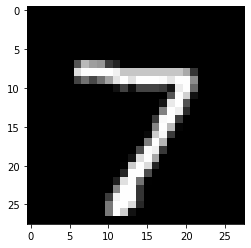

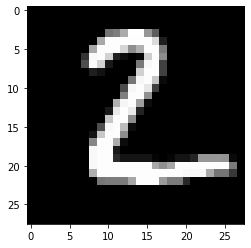

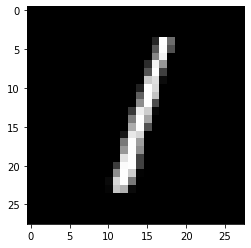

In [21]:
for i in range(0,3):
    img = test_images[i]
    img = np.array(img, dtype='float')
    pix = img.reshape((28,28))
    plt.imshow(pix, cmap='gray')
    plt.show()

In [23]:
predict_img = seq_model.predict(test_images[:3])
print(np.argmax(predict_img,axis = 1))
print(test_labels[:3])

[7 2 1]
[7 2 1]
